In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

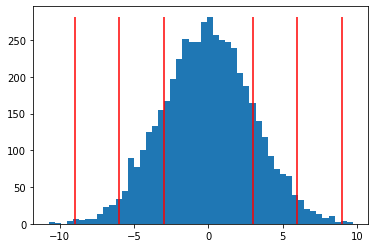

In [2]:
N=5000
sigma =3
obs = np.random.normal(scale=sigma, size=N)
bins = plt.hist(obs, bins=N//100)
plt.vlines([k*sigma for k in range(-3,4) if k!=0], 0, max(bins[0]), color='r')


## 2

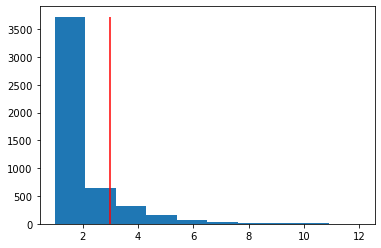

In [3]:
obs = np.random.geometric(p=0.5, size=N)
max_ = np.max(obs)
q08 = np.quantile(obs, 0.8)
bins = plt.hist(obs)
plt.vlines([q08], 0, max(bins[0]), color='red')

In [4]:
print(f'All observations are contained in the [0, {max_}] interval')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {np.round(100 * q08/max_)}% of the interval') 

All observations are contained in the [0, 12] interval
80% percent of the data is contained in the [0, 3.0] interval, which covers 25.0% of the interval


## 3

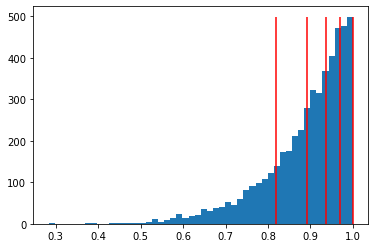

In [5]:
obs = np.random.power(a=8, size=N)
quantiles = [np.quantile(obs, i/5) for i in range(1,6)]
bins = plt.hist(obs, bins=N//100)
plt.vlines(quantiles, 0, max(bins[0]), color='red')

We can see (1st line) that 20% of the data is contained in [0, 0.8] interval

## 4

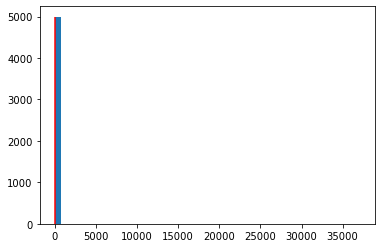

In [6]:
obs = np.random.zipf(a=2, size=N)
max_ = np.max(obs)
q08 = np.quantile(obs, 0.8)
bins = plt.hist(obs, bins=N//100)
plt.vlines([q08], 0, max(bins[0]), color='red')

In [7]:
print(f'All observations are contained in the [0, {max_}] interval')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {np.round(100 * q08/max_, 5)}% of the interval') 

All observations are contained in the [0, 37019] interval
80% percent of the data is contained in the [0, 3.0] interval, which covers 0.0081% of the interval


## 5

## 6.3

In [8]:
import networkx as nx

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


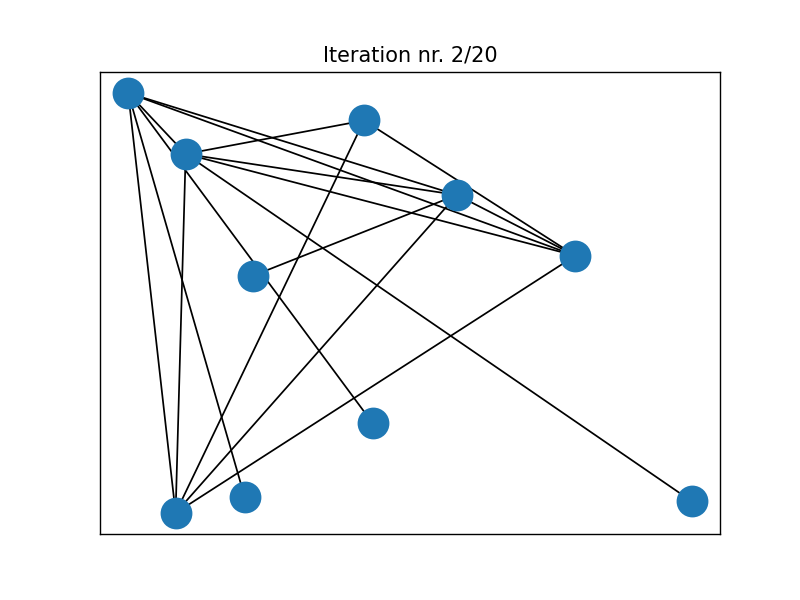

In [14]:
from matplotlib.animation import FuncAnimation

G = nx.random_internet_as_graph(n=10)

fig, ax = plt.subplots()
nx.draw_networkx(G, nx.spring_layout(G, iterations=1, seed=42), with_labels=False)

# def init():
#     ax.set_xlim(0, 2*np.pi)
#     ax.set_ylim(-1, 1)
#     return ln,
def init():
    nx.draw_networkx(G, nx.spring_layout(G, iterations=1, seed=42), with_labels=False, ax=ax)
    return ax
    

def update(frame):
    ax.clear()
    nx.draw_networkx(G, nx.spring_layout(G, iterations=round(frame), seed=42), with_labels=False, ax=ax)
    ax.set_title(f"Iteration nr. {round(frame)}/20")
    return ax

ani = FuncAnimation(fig, update, frames=np.linspace(0, 20), interval=500, init_func=init)